# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/ProgettoTS')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# NLTK and spacy installation

In [ ]:
#NLTK Installation
import nltk
nltk.download('all')

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

Dopo aver eseguito le celle di installazione riavvia il Runtime di Colab


# Reading the text in input 

To upload file from your local drive:

In [ ]:
from google.colab import files
def load_file_locale():
  uploaded = files.upload()
  for name, data in uploaded.items():
    filename = name

  input_f = open(filename, 'r')
  text = input_f.read()
  input_f.close()
  return text

To upload file from your google drive '`ProgettoTS/content`' folder:

In [ ]:
def load_from_colab():
  # Read the input file
  k= input("Insert n. file: ")
  #all files in 'ProgettoTS/content' folder are likely exampleX.txt
  example1 = "content/example"+str(k)+".txt"
  # Open file 
  with open(example1, "r") as file:
      text = file.read()  #file content
  print(example1, "uploaded!")
  return text

In [ ]:
text=load_file_locale()

#Se decommenti la riga successiva scrivi 1 o 2 nella barra che ti uscirà. Sono i file utilizzati durante lo sviluppo del progetto
#text=load_from_colab()


Insert n. file: 3
content/example3.txt uploaded!


In [ ]:
print(text)

Harry Potter è una serie di romanzi fantasy scritta da J. K. Rowling, incentrata sulle avventure del giovane mago Harry Potter e dei suoi migliori amici Ron Weasley ed Hermione Granger, studenti della Scuola di Magia e Stregoneria di Hogwarts. Il mondo magico nel quale è ambientata la saga consiste in una società parallela che vive celata al resto del mondo reale, quello delle persone comuni, che vengono definite "babbani". L'arco narrativo segue principalmente lo scontro tra il protagonista e il mago oscuro Lord Voldemort, desideroso di conquistare il mondo magico e l'immortalità. Ideata nei primi anni 1990, la serie, pubblicata in sette libri tra il 1997 e il 2007, riscosse un ampio successo commerciale e mediatico, generando un grande seguito sia tra i più giovani, sia tra gli adulti. Tradotta in oltre ottanta lingue, tra le quali il latino e il greco antico, Harry Potter resta una delle serie di libri più vendute nella storia dell'editoria, con una vendita complessiva di 500 milion

In [ ]:
def remove_special_characters(text):
  import re
  # Create a regex pattern to match all characters except letter or number
  pattern = r"[^A-Za-z0-9.,?!;:']+"
  # Remove special characters from the string
  text = re.sub(pattern, ' ', text)
  return text

text=remove_special_characters(text)
print(text)

Harry Potter una serie di romanzi fantasy scritta da J. K. Rowling, incentrata sulle avventure del giovane mago Harry Potter e dei suoi migliori amici Ron Weasley ed Hermione Granger, studenti della Scuola di Magia e Stregoneria di Hogwarts. Il mondo magico nel quale ambientata la saga consiste in una societ parallela che vive celata al resto del mondo reale, quello delle persone comuni, che vengono definite babbani . L'arco narrativo segue principalmente lo scontro tra il protagonista e il mago oscuro Lord Voldemort, desideroso di conquistare il mondo magico e l'immortalit . Ideata nei primi anni 1990, la serie, pubblicata in sette libri tra il 1997 e il 2007, riscosse un ampio successo commerciale e mediatico, generando un grande seguito sia tra i pi giovani, sia tra gli adulti. Tradotta in oltre ottanta lingue, tra le quali il latino e il greco antico, Harry Potter resta una delle serie di libri pi vendute nella storia dell'editoria, con una vendita complessiva di 500 milioni di cop



> Dependency Parsing





In [ ]:
import nltk
#nltk.download('punkt')
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(text) #Split into list of sentences.

#Print of sentences
count=1
for sentence in sentences:
  print("Sentence", count,"- "+sentence)
  count = count+1

Sentence 1 - Harry Potter è una serie di romanzi fantasy scritta da J. K. Rowling, incentrata sulle avventure del giovane mago Harry Potter e dei suoi migliori amici Ron Weasley ed Hermione Granger, studenti della Scuola di Magia e Stregoneria di Hogwarts.
Sentence 2 - Il mondo magico nel quale è ambientata la saga consiste in una società parallela che vive celata al resto del mondo reale, quello delle persone comuni, che vengono definite "babbani".
Sentence 3 - L'arco narrativo segue principalmente lo scontro tra il protagonista e il mago oscuro Lord Voldemort, desideroso di conquistare il mondo magico e l'immortalità.
Sentence 4 - Ideata nei primi anni 1990, la serie, pubblicata in sette libri tra il 1997 e il 2007, riscosse un ampio successo commerciale e mediatico, generando un grande seguito sia tra i più giovani, sia tra gli adulti.
Sentence 5 - Tradotta in oltre ottanta lingue, tra le quali il latino e il greco antico, Harry Potter resta una delle serie di libri più vendute nell

# Visualizing the dependency parse

In [ ]:
import spacy
from spacy import displacy
from pathlib import Path

nlp = spacy.load("en_core_web_sm")

count=1
for sentence in sentences:
  sentence_doc = nlp(sentence)
  
  svg = displacy.render(sentence_doc, style='dep', jupyter=True)
  #output_path = Path("./images/dependency_plot_sentence"+str(count)+".svg") # you can keep there only "dependency_plot.svg" if you want to save it in the same folder where you run the script 
  #output_path.open("w", encoding="utf-8").write(svg)
  print("Sentence", count,"- "+sentence)
  count = count+1

Sentence 1 - Harry Potter è una serie di romanzi fantasy scritta da J. K. Rowling, incentrata sulle avventure del giovane mago Harry Potter e dei suoi migliori amici Ron Weasley ed Hermione Granger, studenti della Scuola di Magia e Stregoneria di Hogwarts.


Sentence 2 - Il mondo magico nel quale è ambientata la saga consiste in una società parallela che vive celata al resto del mondo reale, quello delle persone comuni, che vengono definite "babbani".


Sentence 3 - L'arco narrativo segue principalmente lo scontro tra il protagonista e il mago oscuro Lord Voldemort, desideroso di conquistare il mondo magico e l'immortalità.


Sentence 4 - Ideata nei primi anni 1990, la serie, pubblicata in sette libri tra il 1997 e il 2007, riscosse un ampio successo commerciale e mediatico, generando un grande seguito sia tra i più giovani, sia tra gli adulti.


Sentence 5 - Tradotta in oltre ottanta lingue, tra le quali il latino e il greco antico, Harry Potter resta una delle serie di libri più vendute nella storia dell'editoria, con una vendita complessiva di 500 milioni di copie fino al 2018.


Sentence 6 - Oltre ai sette romanzi, l'autrice ha pubblicato tre pseudobiblia come supplemento alla saga: Gli animali fantastici: dove trovarli, Il Quidditch attraverso i secoli e Le fiabe di Beda il Bardo.


Sentence 7 - A ciò si aggiunge la sceneggiatura dello spettacolo teatrale Harry Potter e la maledizione dell'erede, pubblicata nel 2016.


Sentence 8 - Nel 2012 è stato inoltre aperto il portale web Pottermore, dedicato alla divulgazione di nuovi approfondimenti sul mondo magico.


Sentence 9 - Associata anche al genere del romanzo di formazione, la saga si concentra da una parte nel tratteggiare l'evoluzione psicologica di molti dei personaggi e, dall'altra, nel presentare e approfondire diversi temi, tra i quali la morte, l'amore, il libero arbitrio, il razzismo, il classismo e il potere politico, generando numerose critiche letterarie, oltre a dibattiti religiosi relativi ai valori morali trasmessi nell'opera.


Sentence 10 - Molti critici hanno notato similitudini tra Harry Potter e varie altre saghe fantasy, in particolare evidenziando punti di contatto con le opere di C. S. Lewis e di J. R. R. Tolkien.


Sentence 11 - Il mondo costruito dalla Rowling è ispirato alla tradizione e al folclore di molti paesi, in modo particolare al folclore britannico.


Sentence 12 - La popolarità della saga ha esercitato un notevole impatto culturale, espressosi inizialmente su internet, nel quale il fandom ha avuto modo di aggregarsi e di confrontarsi su varie piattaforme, quali forum e fansite.


Sentence 13 - In ambito sportivo si è affermato il quidditch, nuovo sport ispiratosi all'omonimo gioco della saga, mentre in ambito musicale alcuni gruppi hanno dato vita al genere del wizard rock.


Sentence 14 - La serie cinematografica ispirata alla saga, prodotta dalla Warner Bros., è stata al momento della sua conclusione la più remunerativa della storia del cinema, con un incasso di oltre sette miliardi di dollari, e i film della serie hanno ottenuto numerosi premi cinematografici.


Sentence 15 - Ai lungometraggi della saga si sono ispirati numerosi videogiochi, i primi dei quali sviluppati dalla EA Games, e una serie di parchi tematici.


Sentence 16 - A partire dal 2016 la Warner Bros. ha dato avvio alla serie di Animali fantastici, incentrata sulle avventure dell'immaginario autore degli Animali fantastici: dove trovarli.




>Shallow Parsing using SpaCy






# Visualizing the entity recognizer

This creates a very neat visualization of the sentence with the  **recognized entities** where each entity type is marked in different colors.

In [ ]:
count=1
for sentence in sentences:
  print("Sentence",count,"is:", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)
  print()
  count=count+1

Sentence 1 is: Harry Potter è una serie di romanzi fantasy scritta da J. K. Rowling, incentrata sulle avventure del giovane mago Harry Potter e dei suoi migliori amici Ron Weasley ed Hermione Granger, studenti della Scuola di Magia e Stregoneria di Hogwarts.



Sentence 2 is: Il mondo magico nel quale è ambientata la saga consiste in una società parallela che vive celata al resto del mondo reale, quello delle persone comuni, che vengono definite "babbani".



Sentence 3 is: L'arco narrativo segue principalmente lo scontro tra il protagonista e il mago oscuro Lord Voldemort, desideroso di conquistare il mondo magico e l'immortalità.



Sentence 4 is: Ideata nei primi anni 1990, la serie, pubblicata in sette libri tra il 1997 e il 2007, riscosse un ampio successo commerciale e mediatico, generando un grande seguito sia tra i più giovani, sia tra gli adulti.



Sentence 5 is: Tradotta in oltre ottanta lingue, tra le quali il latino e il greco antico, Harry Potter resta una delle serie di libri più vendute nella storia dell'editoria, con una vendita complessiva di 500 milioni di copie fino al 2018.



Sentence 6 is: Oltre ai sette romanzi, l'autrice ha pubblicato tre pseudobiblia come supplemento alla saga: Gli animali fantastici: dove trovarli, Il Quidditch attraverso i secoli e Le fiabe di Beda il Bardo.



Sentence 7 is: A ciò si aggiunge la sceneggiatura dello spettacolo teatrale Harry Potter e la maledizione dell'erede, pubblicata nel 2016.



Sentence 8 is: Nel 2012 è stato inoltre aperto il portale web Pottermore, dedicato alla divulgazione di nuovi approfondimenti sul mondo magico.



Sentence 9 is: Associata anche al genere del romanzo di formazione, la saga si concentra da una parte nel tratteggiare l'evoluzione psicologica di molti dei personaggi e, dall'altra, nel presentare e approfondire diversi temi, tra i quali la morte, l'amore, il libero arbitrio, il razzismo, il classismo e il potere politico, generando numerose critiche letterarie, oltre a dibattiti religiosi relativi ai valori morali trasmessi nell'opera.



Sentence 10 is: Molti critici hanno notato similitudini tra Harry Potter e varie altre saghe fantasy, in particolare evidenziando punti di contatto con le opere di C. S. Lewis e di J. R. R. Tolkien.



Sentence 11 is: Il mondo costruito dalla Rowling è ispirato alla tradizione e al folclore di molti paesi, in modo particolare al folclore britannico.



Sentence 12 is: La popolarità della saga ha esercitato un notevole impatto culturale, espressosi inizialmente su internet, nel quale il fandom ha avuto modo di aggregarsi e di confrontarsi su varie piattaforme, quali forum e fansite.



Sentence 13 is: In ambito sportivo si è affermato il quidditch, nuovo sport ispiratosi all'omonimo gioco della saga, mentre in ambito musicale alcuni gruppi hanno dato vita al genere del wizard rock.



Sentence 14 is: La serie cinematografica ispirata alla saga, prodotta dalla Warner Bros., è stata al momento della sua conclusione la più remunerativa della storia del cinema, con un incasso di oltre sette miliardi di dollari, e i film della serie hanno ottenuto numerosi premi cinematografici.



Sentence 15 is: Ai lungometraggi della saga si sono ispirati numerosi videogiochi, i primi dei quali sviluppati dalla EA Games, e una serie di parchi tematici.



Sentence 16 is: A partire dal 2016 la Warner Bros. ha dato avvio alla serie di Animali fantastici, incentrata sulle avventure dell'immaginario autore degli Animali fantastici: dove trovarli.


In [ ]:
import numpy as np
import pandas as pd
frames = []
count=1
for sentence in sentences:
    doc = sentence
    doc = nlp(doc)

    ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents if len(e.text.strip(' -—')) > 0]
    frame = pd.DataFrame(ents)
    frames.append(frame)

# Word indices

In [ ]:
ner = pd.concat(frames)
ner.columns = ['Text','Start','Stop','NER_Type']
ner.tail()

,Text,Start,Stop,NER_Type
1,Warner Bros.,22,34,ORG
2,alla serie,49,59,PERSON
3,Animali,63,70,NORP
4,dell'immaginario,110,126,PERSON
5,Animali,140,147,NORP


# Named Entity Recognition Histogram


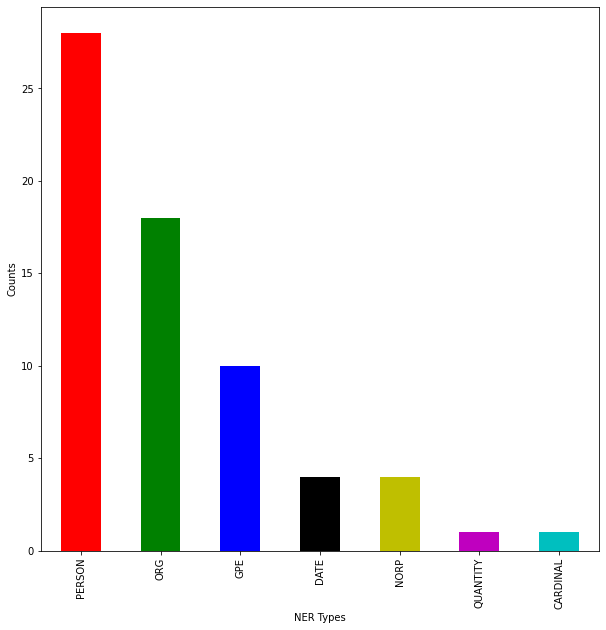

In [ ]:
import matplotlib.pyplot as plt
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,10))
plt.xlabel("NER Types")
plt.ylabel("Counts")

ner.NER_Type.value_counts().plot(kind='bar', color = color_list)

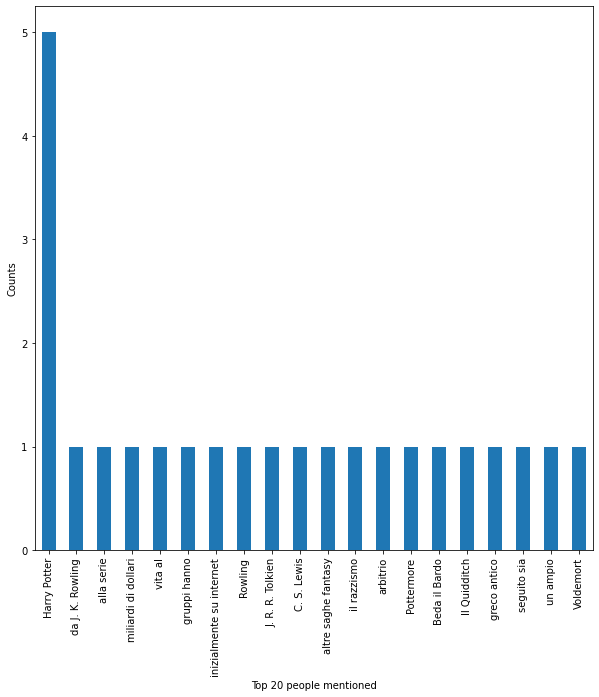

In [ ]:
person = ner[ner.NER_Type == 'PERSON']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 people mentioned")
plt.ylabel("Counts")

person.Text.value_counts()[:20].plot(kind='bar')